Dataset Description
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

ImageId,Label
1,3
2,7
3,8 
(27997 more lines)
The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

Import Libs

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

Import data in different variables

In [3]:
train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [5]:
# Basic Information of Data
print("Dataset columns: ", train.columns)
print(train.info())

Dataset columns:  Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [6]:
#Seprate features from target
X = train.drop('label', axis = 1)
y = train.label                   #target attribute

Normalize & Split the data

In [7]:
#features values must range from 0 to 1
X = X / 255.0    
X_test = X_test/255.0

In [8]:
# split the data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.80, random_state = 42)

Checking Shape

In [9]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (33600, 784)
y_train shape: (33600,)
X_val shape: (8400, 784)
y_val shape: (8400,)


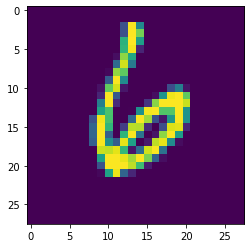

In [12]:
# resize the data to it's original form to visualize
X_train_reshaped = X_train.values.reshape(-1, 28, 28)
plt.imshow(X_train_reshaped[0])

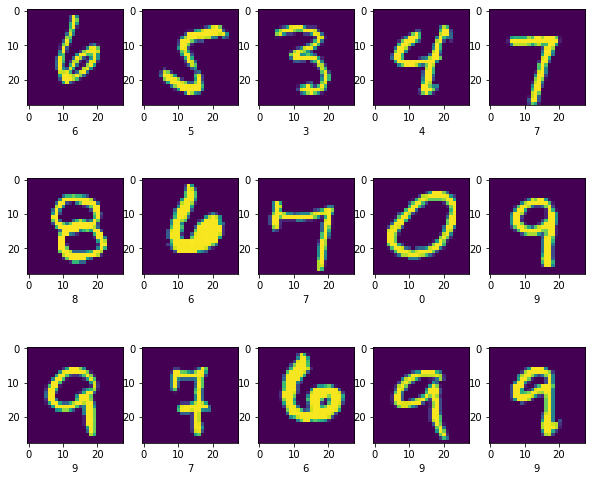

In [14]:
#visualize the first 10 images and their label

plt.figure(figsize=(10, 15))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

In [15]:
# try three models with different architecture of layers
input_shape = [X_train.shape[1]]

model_1 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 350, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 165, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 64, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 10, activation = 'linear')
])

model_2 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 80, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    Dense(units = 10, activation = 'linear')
])

model_3 = Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    Dense(units = 560, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 700, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 430, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 120, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    Dense(units = 10, activation = 'linear')
])

2023-05-27 18:10:13.067533: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2023-05-27 18:10:13.067567: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: ray-H310M
2023-05-27 18:10:13.067613: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: ray-H310M
2023-05-27 18:10:13.068444: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 510.108.3
2023-05-27 18:10:13.068483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 390.157.0
2023-05-27 18:10:13.068491: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 390.157.0 does not match DSO version 510.108.3 -- cannot find working devices in this configuration


Training model_1...


2023-05-27 18:10:35.754504: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 210739200 exceeds 10% of free system memory.
2023-05-27 18:10:40.103778: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52684800 exceeds 10% of free system memory.


Done!

Training model_2...


2023-05-27 18:11:25.808382: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 210739200 exceeds 10% of free system memory.
2023-05-27 18:11:27.554047: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52684800 exceeds 10% of free system memory.


Done!

Training model_3...


2023-05-27 18:11:49.878959: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 210739200 exceeds 10% of free system memory.


Done!



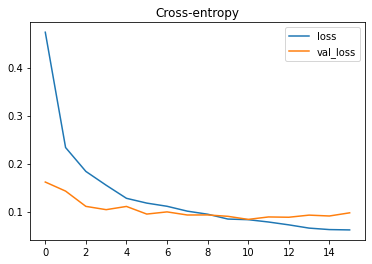

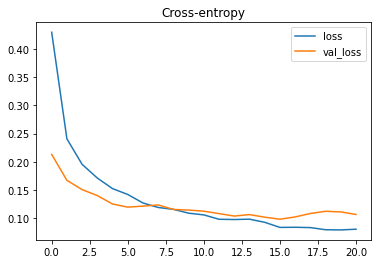

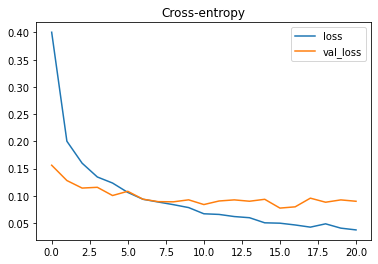

In [16]:
# evaluate each model 

models = [model_1, model_2, model_3]
nn_train_loss = []
nn_cv_loss    = []

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

for model in models:
    model.compile(loss = SparseCategoricalCrossentropy(from_logits= True),
               optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
               metrics = ['accuracy'])
    
    print(f"Training model_{models.index(model) + 1}...")
    history = model.fit(X_train, y_train, epochs = 50,
           validation_data = (X_val, y_val),
           batch_size = 50,
           callbacks=[early_stopping],
           verbose = 0
           )
    
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
    #history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
    
    print("Done!\n")

#You can change Values in different architecture of layers

In [17]:
# It's seems like model_1 performs better
best_model = model_1

# train on all the dataset
best_model.fit(X, y, callbacks=[early_stopping], batch_size = 50, epochs = 50)

#predict
test_predictions = tf.nn.softmax(best_model.predict(X_test)).numpy()

Epoch 1/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0956 - accuracy: 0.9709
Epoch 2/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0811 - accuracy: 0.9746
Epoch 3/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0758 - accuracy: 0.9767
Epoch 4/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0711 - accuracy: 0.9786
Epoch 5/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0686 - accuracy: 0.9790
Epoch 6/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0636 - accuracy: 0.9802
Epoch 7/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0577 - accuracy: 0.9819
Epoch 8/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0595 - accuracy: 0.9819
Epoch 9/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0546 - accuracy: 0.9827
Epoch 10/50
840/840 [==============================] - 4s 5ms/step - loss: 0.0545 - accuracy: 0.9821

Checking Model 1 Accuracy

<Axes: title={'center': 'Accuracy'}>

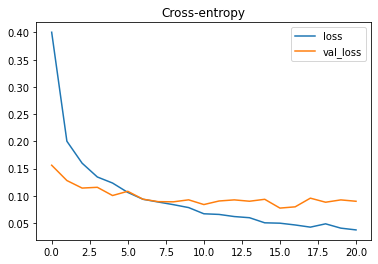

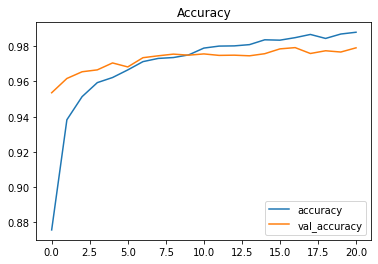

In [18]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

Exporting submission

In [19]:
ImageId = []
Label = []
for i in range(len(test_predictions)):
    ImageId.append(i+1)
    Label.append(test_predictions[i].argmax())
    
submissions=pd.DataFrame({"ImageId": ImageId,
                         "Label": Label})
submissions.to_csv("submission.csv", index=False, header=True)

In [20]:
#END